APERTURA DE ARCHIVO

#### 0.0.1 - 2021 - 01 - 01
#### Dr. Marco Aceves 
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### De 0 a 100 en IA
#### Imputación.ipynb

In [4]:
#Librerias
import pandas as pd
import json
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Archivo de entrenamiento
archivo = 'train_dataset.json'

#Leer el archivo json
with open(archivo) as entrenamiento_archivo:
  dict_entrenamiento = json.load(entrenamiento_archivo)

#Convertir en un data frame, con indices nuevos
entrenamiento = pd.DataFrame.from_dict(dict_entrenamiento, orient='index')
entrenamiento.reset_index(level=0, inplace=True)
#Trasponer filas y columndas
entrenamiento = entrenamiento.T
entrenamiento.loc[['index']]

#Nombrar las columnas
entrenamiento = entrenamiento.rename(columns=entrenamiento.loc['index'])
#Deshacer la columna de índices
entrenamiento = entrenamiento.drop('index')

#Convertir a un archivo csv
entrenamiento2 = entrenamiento
entrenamiento.to_csv('train_dataset2.csv', index=False)
df = pd.read_csv('train_dataset2.csv')
#print(df)

ELIMINAR LOS ATRIBUTOS CUYA AUSENCIA DE INSTANCIAS ES MAYOR AL 50 POR CIENTO

In [5]:
# Contar los valores nulos por instancia
valores_nulos = df.isnull().sum(axis=1)

# Sobrescribir en el DataFrame original las instancias buenas
df = df[valores_nulos < 9]

# Reindexar el DataFrame para corregir los índices saltados
df = df.reset_index(drop=True)
#print(df)

MOSTRAR DATOS FALTANTES POR ATRIBUTO

In [6]:
#Datos faltantes por atributo
df.isna().sum()

graphic card type          90
communications            236
resolution (px)           135
CPU cores                   0
RAM size                   77
operating system          166
drive type                 51
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

**IMPUTACIONES CON KNN E HISTROGRAMAS**

Atributo "graphic card type"

In [7]:
#Eliminar todos los datos faltantes para el set de entrenamiento
XY = df.dropna().to_numpy()

# Columna de características
x_entreno = XY[:, 16]

# Columna a predecir
y_entreno = XY[:, 0]

# Indices de filas incompletas
filas = df[~df['graphic card type'].notna()].index

# Datos de precios para los índices anteriores
x_prueba = df['buynow_price'].loc[filas].to_numpy()

# Codificar los datos de los atributos categóricos, obteniendo las clases
cod = OrdinalEncoder()
cod.fit(y_entreno.reshape(-1, 1))

# Se transforman las clases (codificar a número)
y_entreno = cod.transform(y_entreno.reshape(-1, 1)).flatten()

# KNN predictor
lr = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d = x_entreno.reshape(-1, 1)

# Entrenar el modelo
lr.fit(x_entreno_2d, y_entreno)

# Predicciones
x_prueba_2d = x_prueba.reshape(-1, 1)
preds = lr.predict(x_prueba_2d)
preds_red = np.round(preds).astype(int)  # Porque se codifica como enteros

# Transformaciones inversas (valores categóricos de vuelta)
cats = cod.inverse_transform(preds_red.reshape(-1, 1))

#Frame con datos imputados
# Llenado de las columnas de interés con los datos a imputar
df1 = df.copy()
df1.iloc[filas, 0] = cats.flatten()  # Se colocan los índices y la columna de interés

# Verificar datos faltantes en el nuevo frame
df1['graphic card type'].isna().sum()

0

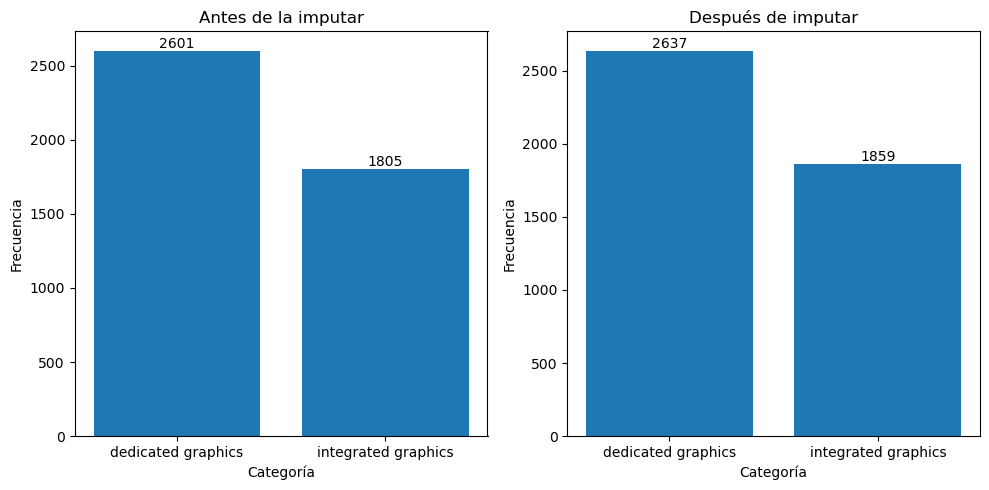

In [8]:
# Frecuencia antes de imputar
frecuencia_antes = df['graphic card type'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues = df1['graphic card type'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes.index, frecuencia_antes.values)
plt.title('Antes de la imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues.index, frecuencia_despues.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

Atributo "communications"

In [9]:
# Eliminar las instancias con datos faltantes
XY_1 = df1.dropna().to_numpy()

# Columna de características
x_entreno_1 = XY_1[:, 16]

# Columna a predecir
y_entreno_1 = XY_1[:, 1]

# Indices de filas incompletas
filas_1 = df[~df['communications'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_1 = df['buynow_price'].loc[filas_1].to_numpy()

# Codificar los datos de los atributos categóricos
cod_1 = OrdinalEncoder()
cod_1.fit(y_entreno_1.reshape(-1, 1))

# Se transforman las clases (codificar)
y_entreno_1 = cod_1.transform(y_entreno_1.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_1 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_1 = x_entreno_1.reshape(-1, 1)

# Entrenar el modelo
lr_1.fit(x_entreno_2d_1, y_entreno_1)

# Predicciones
x_prueba_2d_1 = x_prueba_1.reshape(-1, 1)
preds_1 = lr_1.predict(x_prueba_2d_1)
preds_red_1 = np.round(preds_1).astype(int)  # Porque se codifica como enteros

# Transformaciones inversas (valores categóricos)
cats_1 = cod_1.inverse_transform(preds_red_1.reshape(-1, 1))

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_1, 1] = cats_1.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['communications'].isna().sum()  # Cambiar el nombre del atributo

0

/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_61650/74166484.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


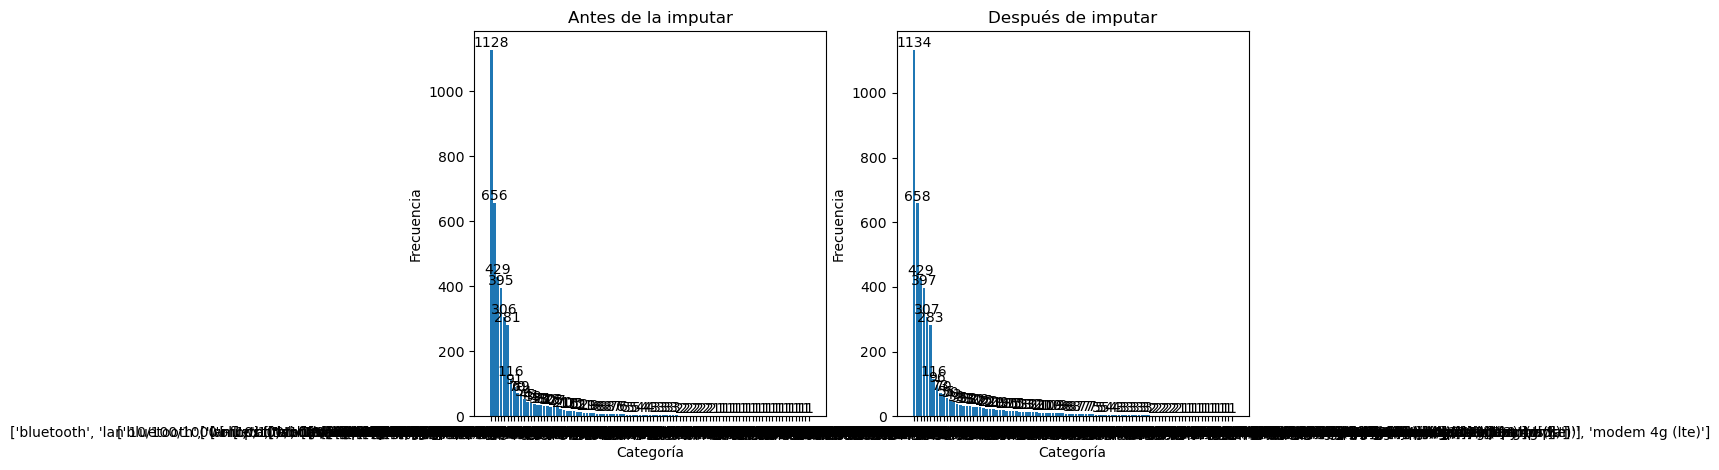

graphic card type           0
communications              0
resolution (px)           135
CPU cores                   0
RAM size                   77
operating system          166
drive type                 51
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [10]:
# Frecuencia antes de imputar
frecuencia_antes_1 = df['communications'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_1 = df1['communications'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_1.index, frecuencia_antes_1.values)
plt.title('Antes de la imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_1.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_1.index, frecuencia_despues_1.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_1.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "resolution (px)"

In [11]:
# Eliminar las instancias con datos faltantes
XY_2 = df1.dropna().to_numpy()

# Columna de características
x_entreno_2 = XY_2[:, 16]

# Columna a predecir
y_entreno_2 = XY_2[:, 2]

# Indices de filas incompletas
filas_2 = df[~df['resolution (px)'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_2 = df['buynow_price'].loc[filas_2].to_numpy()

# Codificar los datos de los atributos categóricos
cod_2 = OrdinalEncoder()
cod_2.fit(y_entreno_2.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod_2.categories_)

# Se transforman las clases (codificar)
y_entreno_2 = cod_2.transform(y_entreno_2.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_2 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_2 = x_entreno_2.reshape(-1, 1)

# Entrenar el modelo
lr_2.fit(x_entreno_2d_2, y_entreno_2)

# Predicciones
x_prueba_2d_2 = x_prueba_2.reshape(-1, 1)
preds_2 = lr_2.predict(x_prueba_2d_2)
preds_red_2 = np.round(preds_2).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_2 = cod_2.inverse_transform(preds_red_2.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_2, 2] = cats_2.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['resolution (px)'].isna().sum()  # Cambiar el nombre del atributo

0

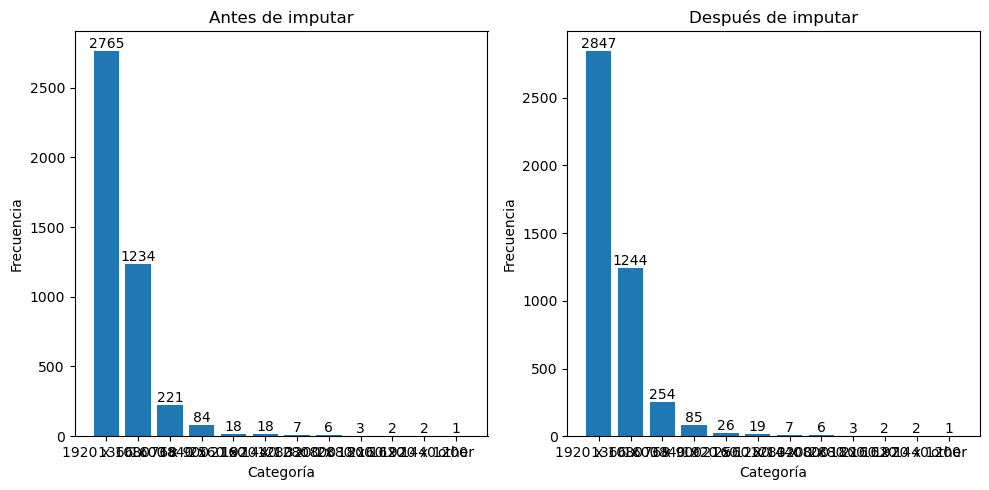

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                   77
operating system          166
drive type                 51
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [13]:
# Frecuencia antes de imputar
frecuencia_antes_2 = df['resolution (px)'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_2 = df1['resolution (px)'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_2.index, frecuencia_antes_2.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_2.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_2.index, frecuencia_despues_2.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_2.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "RAM size"

In [14]:
# Eliminar las instancias con datos faltantes
XY_4 = df1.dropna().to_numpy()

# Columna de características
x_entreno_4 = XY_4[:, 16]

# Columna a predecir
y_entreno_4 = XY_4[:, 4]

# Indices de filas incompletas
filas_4 = df[~df['RAM size'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_4 = df['buynow_price'].loc[filas_4].to_numpy()

# Codificar los datos de los atributos categóricos
cod_4 = OrdinalEncoder()
cod_4.fit(y_entreno_4.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_4 = cod_4.transform(y_entreno_4.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_4 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_4 = x_entreno_4.reshape(-1, 1)

# Entrenar el modelo
lr_4.fit(x_entreno_2d_4, y_entreno_4)

# Predicciones
x_prueba_2d_4 = x_prueba_4.reshape(-1, 1)
preds_4 = lr_4.predict(x_prueba_2d_4)
preds_red_4 = np.round(preds_4).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_4 = cod_4.inverse_transform(preds_red_4.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_4, 4] = cats_4.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['RAM size'].isna().sum()  # Cambiar el nombre del atributo

0

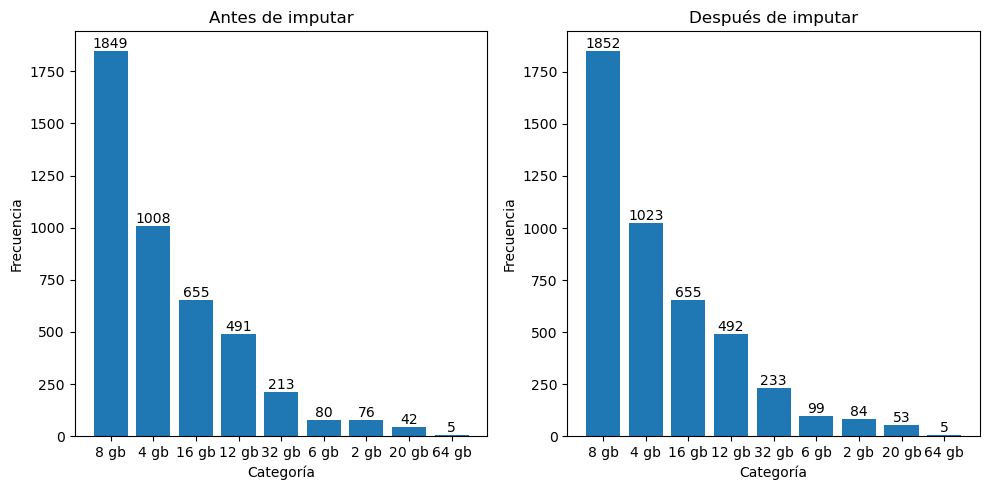

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system          166
drive type                 51
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [15]:
# Frecuencia antes de imputar
frecuencia_antes_4 = df['RAM size'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_4 = df1['RAM size'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_4.index, frecuencia_antes_4.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_4.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_4.index, frecuencia_despues_4.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_4.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "operating system"

In [16]:
# Eliminar las instancias con datos faltantes
XY_5 = df1.dropna().to_numpy()

# Columna de características
x_entreno_5 = XY_5[:, 16]

# Columna a predecir
y_entreno_5 = XY_5[:, 5]

# Indices de filas incompletas
filas_5 = df[~df['operating system'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_5 = df['buynow_price'].loc[filas_5].to_numpy()

# Codificar los datos de los atributos categóricos
cod_5 = OrdinalEncoder()
cod_5.fit(y_entreno_5.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_5 = cod_5.transform(y_entreno_5.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_5 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_5 = x_entreno_5.reshape(-1, 1)

# Entrenar el modelo
lr_5.fit(x_entreno_2d_5, y_entreno_5)

# Predicciones
x_prueba_2d_5 = x_prueba_5.reshape(-1, 1)
preds_5 = lr_5.predict(x_prueba_2d_5)
preds_red_5 = np.round(preds_5).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_5 = cod_5.inverse_transform(preds_red_5.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_5, 5] = cats_5.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['operating system'].isna().sum()  # Cambiar el nombre del atributo

0

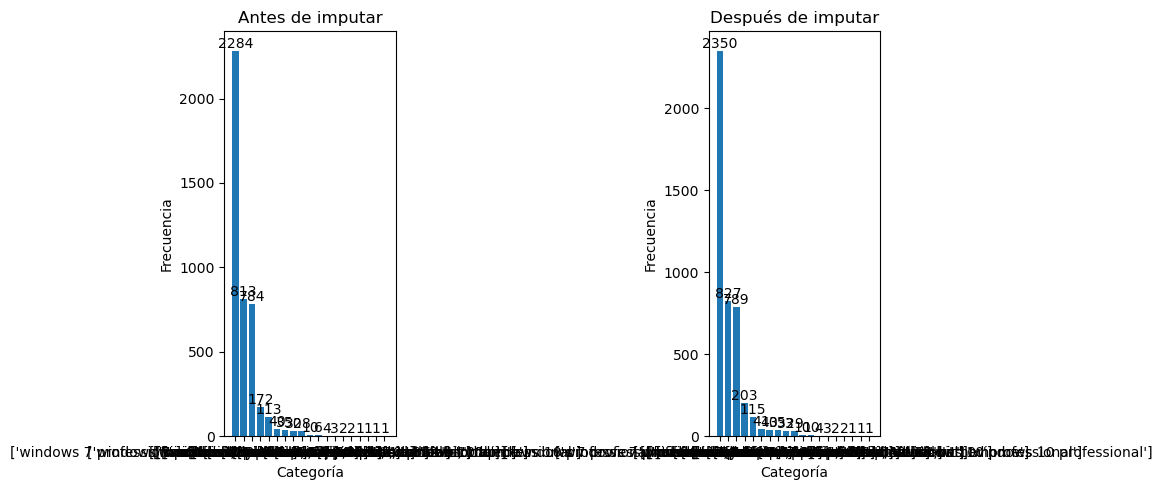

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [19]:
# Frecuencia antes de imputar
frecuencia_antes_5 = df['operating system'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_5 = df1['operating system'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_5.index, frecuencia_antes_5.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_5.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_5.index, frecuencia_despues_5.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_5.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "drive type"

In [20]:
# Eliminar las instancias con datos faltantes
XY_6 = df1.dropna().to_numpy()

# Columna de características
x_entreno_6 = XY_6[:, 16]

# Columna a predecir
y_entreno_6 = XY_6[:, 6]

# Indices de filas incompletas
filas_6 = df[~df['drive type'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_6 = df['buynow_price'].loc[filas_6].to_numpy()

# Codificar los datos de los atributos categóricos
cod_6 = OrdinalEncoder()
cod_6.fit(y_entreno_6.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_6 = cod_6.transform(y_entreno_6.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_6 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_6 = x_entreno_6.reshape(-1, 1)

# Entrenar el modelo
lr_6.fit(x_entreno_2d_6, y_entreno_6)

# Predicciones
x_prueba_2d_6 = x_prueba_6.reshape(-1, 1)
preds_6 = lr_6.predict(x_prueba_2d_6)
preds_red_6 = np.round(preds_6).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_6 = cod_6.inverse_transform(preds_red_6.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_6, 6] = cats_6.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['drive type'].isna().sum()  # Cambiar el nombre del atributo

0

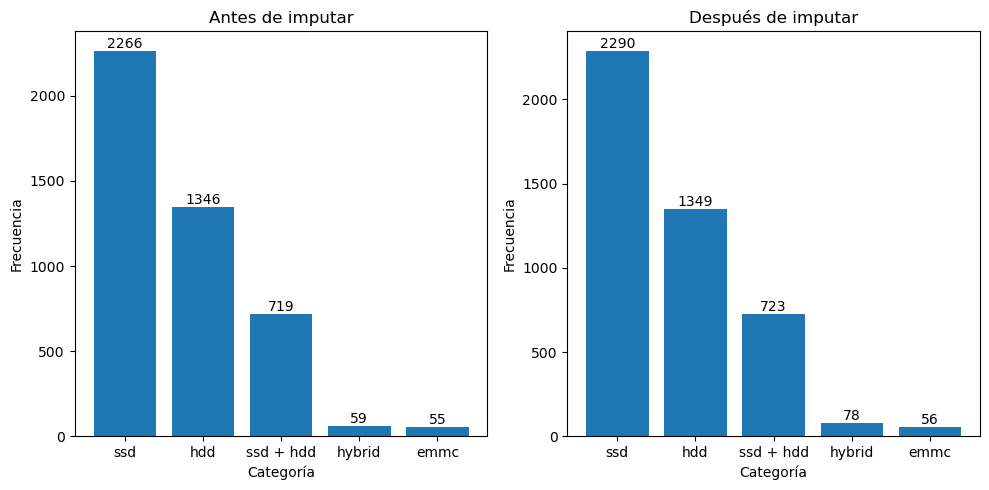

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices             209
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [21]:
# Frecuencia antes de imputar
frecuencia_antes_6 = df['drive type'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_6 = df1['drive type'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_6.index, frecuencia_antes_6.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_6.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_6.index, frecuencia_despues_6.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_6.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "input devices"

In [22]:
# Eliminar las instancias con datos faltantes
XY_7 = df1.dropna().to_numpy()

# Columna de características
x_entreno_7 = XY_7[:, 16]

# Columna a predecir
y_entreno_7 = XY_7[:, 7]

# Indices de filas incompletas
filas_7 = df[~df['input devices'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_7 = df['buynow_price'].loc[filas_7].to_numpy()

# Codificar los datos de los atributos categóricos
cod_7 = OrdinalEncoder()
cod_7.fit(y_entreno_7.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_7 = cod_7.transform(y_entreno_7.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_7 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_7 = x_entreno_7.reshape(-1, 1)

# Entrenar el modelo
lr_7.fit(x_entreno_2d_7, y_entreno_7)

# Predicciones
x_prueba_2d_7 = x_prueba_7.reshape(-1, 1)
preds_7 = lr_7.predict(x_prueba_2d_7)
preds_red_7 = np.round(preds_7).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_7 = cod_7.inverse_transform(preds_red_7.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_7, 7] = cats_7.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['input devices'].isna().sum()  # Cambiar el nombre del atributo

0

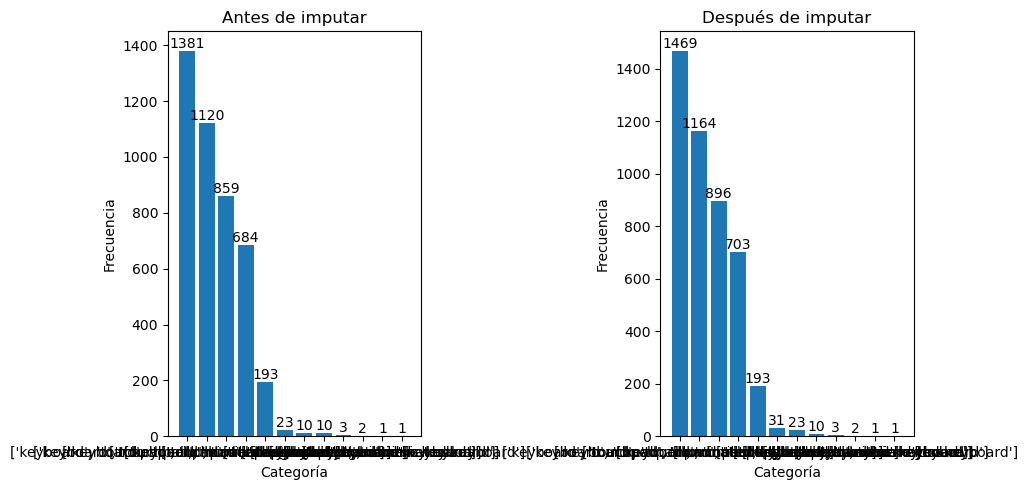

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices               0
multimedia                187
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [23]:
# Frecuencia antes de imputar
frecuencia_antes_7 = df['input devices'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_7 = df1['input devices'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_7.index, frecuencia_antes_7.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_7.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_7.index, frecuencia_despues_7.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_7.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "multimedia"

In [24]:
# Eliminar las instancias con datos faltantes
XY_8 = df1.dropna().to_numpy()

# Columna de características
x_entreno_8 = XY_8[:, 16]

# Columna a predecir
y_entreno_8 = XY_8[:, 8]

# Indices de filas incompletas
filas_8 = df[~df['multimedia'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_8 = df['buynow_price'].loc[filas_8].to_numpy()

# Codificar los datos de los atributos categóricos
cod_8 = OrdinalEncoder()
cod_8.fit(y_entreno_8.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_8 = cod_8.transform(y_entreno_8.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_8 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_8 = x_entreno_8.reshape(-1, 1)

# Entrenar el modelo
lr_8.fit(x_entreno_2d_8, y_entreno_8)

# Predicciones
x_prueba_2d_8 = x_prueba_8.reshape(-1, 1)
preds_8 = lr_8.predict(x_prueba_2d_8)
preds_red_8 = np.round(preds_8).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_8 = cod_8.inverse_transform(preds_red_8.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_8, 8] = cats_8.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['multimedia'].isna().sum()  # Cambiar el nombre del atributo

0

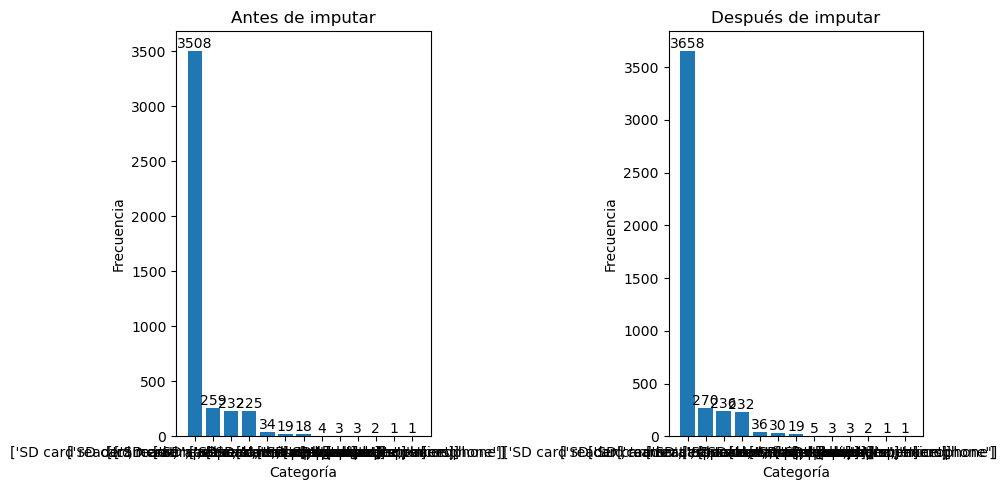

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices               0
multimedia                  0
RAM type                  285
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [26]:
# Frecuencia antes de imputar
frecuencia_antes_8 = df['multimedia'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_8 = df1['multimedia'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_8.index, frecuencia_antes_8.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_8.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_8.index, frecuencia_despues_8.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_8.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "RAM type"

In [27]:
# Eliminar las instancias con datos faltantes
XY_9 = df1.dropna().to_numpy()

# Columna de características
x_entreno_9 = XY_9[:, 16]

# Columna a predecir
y_entreno_9 = XY_9[:, 9]

# Indices de filas incompletas
filas_9 = df[~df['RAM type'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_9 = df['buynow_price'].loc[filas_9].to_numpy()

# Codificar los datos de los atributos categóricos
cod_9 = OrdinalEncoder()
cod_9.fit(y_entreno_9.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_9 = cod_9.transform(y_entreno_9.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_9 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_9 = x_entreno_9.reshape(-1, 1)

# Entrenar el modelo
lr_9.fit(x_entreno_2d_9, y_entreno_9)

# Predicciones
x_prueba_2d_9 = x_prueba_9.reshape(-1, 1)
preds_9 = lr_9.predict(x_prueba_2d_9)
preds_red_9 = np.round(preds_9).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_9 = cod_9.inverse_transform(preds_red_9.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_9, 9] = cats_9.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['RAM type'].isna().sum()  # Cambiar el nombre del atributo

0

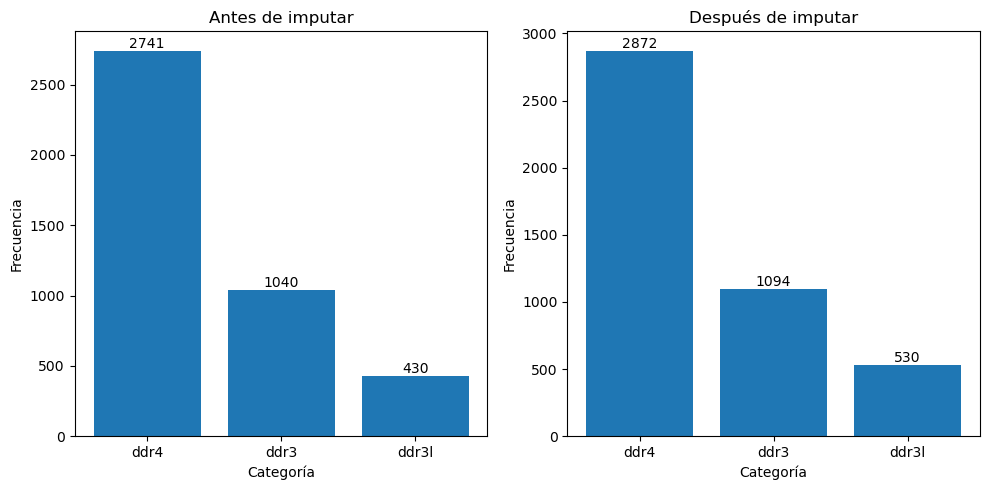

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices               0
multimedia                  0
RAM type                    0
CPU clock speed (GHz)     315
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [28]:
# Frecuencia antes de imputar
frecuencia_antes_9 = df['RAM type'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_9 = df1['RAM type'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_9.index, frecuencia_antes_9.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_9.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_9.index, frecuencia_despues_9.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_9.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "CPU clock speed (GHz)"

In [29]:
# Eliminar las instancias con datos faltantes
XY_10 = df1.dropna().to_numpy()

# Columna de características
x_entreno_10 = XY_10[:, 16]

# Columna a predecir
y_entreno_10 = XY_10[:, 10]

# Indices de filas incompletas
filas_10 = df[~df['CPU clock speed (GHz)'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_10 = df['buynow_price'].loc[filas_10].to_numpy()

# Codificar los datos de los atributos categóricos
cod_10 = OrdinalEncoder()
cod_10.fit(y_entreno_10.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_10 = cod_10.transform(y_entreno_10.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_10 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_10 = x_entreno_10.reshape(-1, 1)

# Entrenar el modelo
lr_10.fit(x_entreno_2d_10, y_entreno_10)

# Predicciones
x_prueba_2d_10 = x_prueba_10.reshape(-1, 1)
preds_10 = lr_10.predict(x_prueba_2d_10)
preds_red_10 = np.round(preds_10).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_10 = cod_10.inverse_transform(preds_red_10.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_10, 10] = cats_10.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['CPU clock speed (GHz)'].isna().sum()  # Cambiar el nombre del atributo

0

/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_61650/1825829314.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


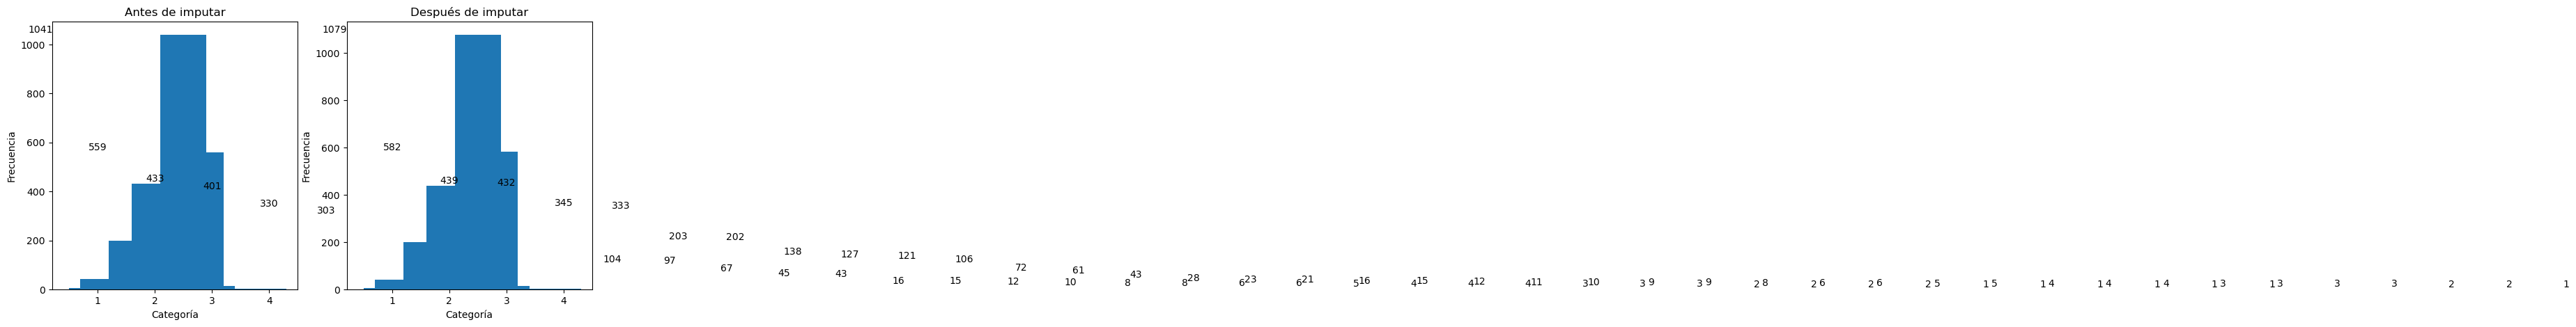

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices               0
multimedia                  0
RAM type                    0
CPU clock speed (GHz)       0
CPU model                 117
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [30]:
# Frecuencia antes de imputar
frecuencia_antes_10 = df['CPU clock speed (GHz)'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_10 = df1['CPU clock speed (GHz)'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_10.index, frecuencia_antes_10.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_10.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_10.index, frecuencia_despues_10.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_10.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "CPU model"

In [31]:
# Eliminar las instancias con datos faltantes
XY_11 = df1.dropna().to_numpy()

# Columna de características
x_entreno_11 = XY_11[:, 16]

# Columna a predecir
y_entreno_11 = XY_11[:, 11]

# Indices de filas incompletas
filas_11 = df[~df['CPU model'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_11 = df['buynow_price'].loc[filas_11].to_numpy()

# Codificar los datos de los atributos categóricos
cod_11 = OrdinalEncoder()
cod_11.fit(y_entreno_11.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_11 = cod_11.transform(y_entreno_11.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_11 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_11 = x_entreno_11.reshape(-1, 1)

# Entrenar el modelo
lr_11.fit(x_entreno_2d_11, y_entreno_11)

# Predicciones
x_prueba_2d_11 = x_prueba_11.reshape(-1, 1)
preds_11 = lr_11.predict(x_prueba_2d_11)
preds_red_11 = np.round(preds_11).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_11 = cod_11.inverse_transform(preds_red_11.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_11, 11] = cats_11.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['CPU model'].isna().sum()  # Cambiar el nombre del atributo

0

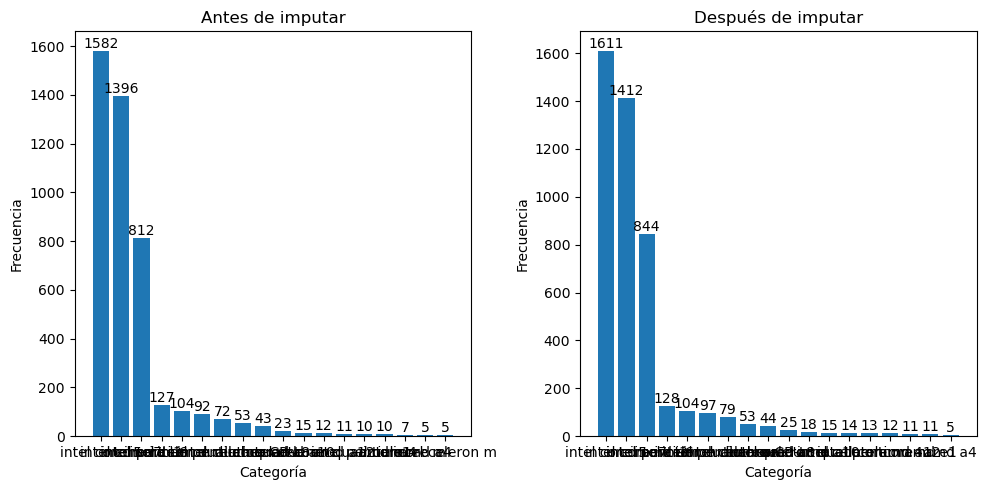

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                  0
input devices               0
multimedia                  0
RAM type                    0
CPU clock speed (GHz)       0
CPU model                   0
state                       0
drive memory size (GB)    108
warranty                    0
screen size                28
buynow_price                0
dtype: int64

In [32]:
# Frecuencia antes de imputar
frecuencia_antes_11 = df['CPU model'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_11 = df1['CPU model'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_11.index, frecuencia_antes_11.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_11.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_11.index, frecuencia_despues_11.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_11.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "drive memory size (GB)"

In [33]:
# Eliminar las instancias con datos faltantes
XY_13 = df1.dropna().to_numpy()

# Columna de características
x_entreno_13 = XY_13[:, 16]

# Columna a predecir
y_entreno_13 = XY_13[:, 13]

# Indices de filas incompletas
filas_13 = df[~df['drive memory size (GB)'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_13 = df['buynow_price'].loc[filas_13].to_numpy()

# Codificar los datos de los atributos categóricos
cod_13 = OrdinalEncoder()
cod_13.fit(y_entreno_13.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod_13.categories_)

# Se transforman las clases (codificar)
y_entreno_13 = cod_13.transform(y_entreno_13.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_13 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_13 = x_entreno_13.reshape(-1, 1)

# Entrenar el modelo
lr_13.fit(x_entreno_2d_13, y_entreno_13)

# Predicciones
x_prueba_2d_13 = x_prueba_13.reshape(-1, 1)
preds_13 = lr_13.predict(x_prueba_2d_13)
preds_red_13 = np.round(preds_13).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_13 = cod_13.inverse_transform(preds_red_13.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_13, 13] = cats_13.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['drive memory size (GB)'].isna().sum()  # Cambiar el nombre del atributo

0

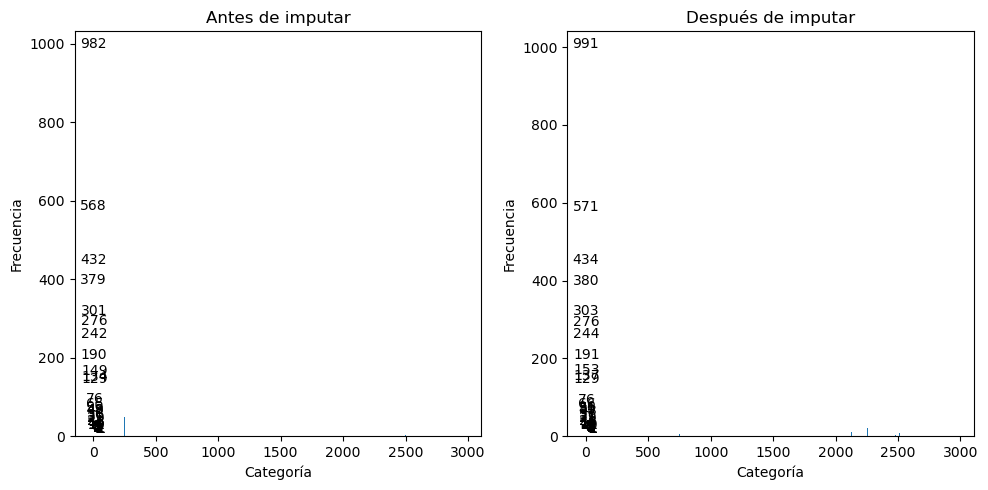

graphic card type          0
communications             0
resolution (px)            0
CPU cores                  0
RAM size                   0
operating system           0
drive type                 0
input devices              0
multimedia                 0
RAM type                   0
CPU clock speed (GHz)      0
CPU model                  0
state                      0
drive memory size (GB)     0
warranty                   0
screen size               28
buynow_price               0
dtype: int64

In [34]:
# Frecuencia antes de imputar
frecuencia_antes_13 = df['drive memory size (GB)'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_13 = df1['drive memory size (GB)'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_13.index, frecuencia_antes_13.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_13.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_13.index, frecuencia_despues_13.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_13.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

Atributo "screen size"

In [35]:
# Eliminar las instancias con datos faltantes
XY_15 = df1.dropna().to_numpy()

# Columna de características
x_entreno_15 = XY_15[:, 16]

# Columna a predecir
y_entreno_15 = XY_15[:, 15]

# Indices de filas incompletas
filas_15 = df[~df['screen size'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_15 = df['buynow_price'].loc[filas_15].to_numpy()

# Codificar los datos de los atributos categóricos
cod_15 = OrdinalEncoder()
cod_15.fit(y_entreno_15.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_15 = cod_15.transform(y_entreno_15.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_15 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_15 = x_entreno_15.reshape(-1, 1)

# Entrenar el modelo
lr_15.fit(x_entreno_2d_15, y_entreno_15)

# Predicciones
x_prueba_2d_15 = x_prueba_15.reshape(-1, 1)
preds_15 = lr_15.predict(x_prueba_2d_15)
preds_red_15 = np.round(preds_15).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_15 = cod_15.inverse_transform(preds_red_15.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_15, 15] = cats_15.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['screen size'].isna().sum()  # Cambiar el nombre del atributo

0

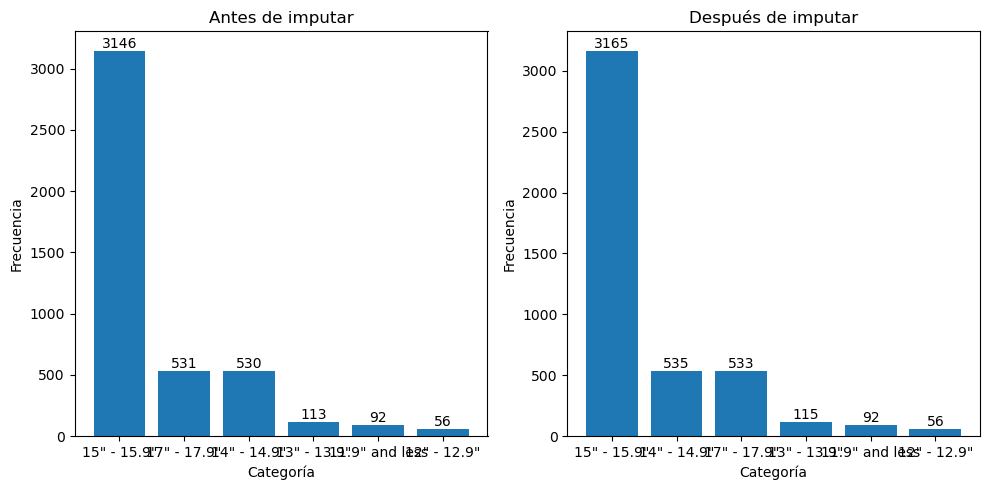

graphic card type         0
communications            0
resolution (px)           0
CPU cores                 0
RAM size                  0
operating system          0
drive type                0
input devices             0
multimedia                0
RAM type                  0
CPU clock speed (GHz)     0
CPU model                 0
state                     0
drive memory size (GB)    0
warranty                  0
screen size               0
buynow_price              0
dtype: int64

In [36]:
# Frecuencia antes de imputar
frecuencia_antes_15 = df['screen size'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_15 = df1['screen size'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_15.index, frecuencia_antes_15.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_15.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_15.index, frecuencia_despues_15.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_15.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

**Se guarda el archivo con las imputaciones**

In [37]:
#Guardar los datos ya imputados en un csv
df1.to_csv('datos_imputados.csv', index=False)

# **Proceso para el archivo de datos "test_dataset.json"**

In [38]:
import pandas as pd
import json
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

archivo = 'test_dataset.json'
with open(archivo) as entrenamiento_archivo:
  dict_entrenamiento = json.load(entrenamiento_archivo)

entrenamiento = pd.DataFrame.from_dict(dict_entrenamiento, orient='index')
entrenamiento.reset_index(level=0, inplace=True)
entrenamiento = entrenamiento.T

entrenamiento.loc[['index']]
entrenamiento = entrenamiento.rename(columns=entrenamiento.loc['index'])
entrenamiento = entrenamiento.drop('index')

entrenamiento2 = entrenamiento
entrenamiento.to_csv('test_dataset2.csv', index=False)

df = pd.read_csv('test_dataset2.csv')
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,"['bluetooth', 'lan 10/100 mbps']",1920 x 1080,2,8 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
1,integrated graphics,"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/...",1920 x 1080,2,4 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
2,dedicated graphics,"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",1920 x 1080,4,16 gb,['windows 10 home'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
3,integrated graphics,"['lan 10/100/1000 mbps', 'nfc (near field comm...",3200 x 1800,2,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['camera', 'speakers', 'microphone']",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
4,integrated graphics,"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",1366 x 768,2,4 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


In [39]:
# Contar los valores nulos por instancia
valores_nulos = df.isnull().sum(axis=1)

# Sobrescribir el DataFrame original las instancias buenas
df = df[valores_nulos < 9]

# Reindexar el DataFrame para corregir los índices saltados
df = df.reset_index(drop=True)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,dedicated graphics,"['bluetooth', 'lan 10/100 mbps']",1920 x 1080,2,8 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
1,integrated graphics,"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/...",1920 x 1080,2,4 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
2,dedicated graphics,"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",1920 x 1080,4,16 gb,['windows 10 home'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
3,integrated graphics,"['lan 10/100/1000 mbps', 'nfc (near field comm...",3200 x 1800,2,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['camera', 'speakers', 'microphone']",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
4,integrated graphics,"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",1366 x 768,2,4 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


In [40]:
#Datos faltantes por atributo
df.isna().sum()

graphic card type          29
communications             89
resolution (px)            49
CPU cores                   0
RAM size                   34
operating system           60
drive type                 13
input devices              75
multimedia                 75
RAM type                  107
CPU clock speed (GHz)     129
CPU model                  31
state                       0
drive memory size (GB)     41
warranty                    0
screen size                15
buynow_price                0
dtype: int64

### Inputaciones con KNN y histogramas

#### Atributo "graphic card type"

In [41]:
# Eliminar las instancias con datos faltantes
XY = df.dropna().to_numpy()

# Columna de características
x_entreno = XY[:, 16]
# Columna a predecir
y_entreno = XY[:, 0]

# Indices de filas incompletas
filas = df[~df['graphic card type'].notna()].index

# Datos de precios para los índices anteriores
x_prueba = df['buynow_price'].loc[filas].to_numpy()

# Codificar los datos de los atributos categóricos
cod = OrdinalEncoder()
cod.fit(y_entreno.reshape(-1, 1))

# Se transforman las clases (codificar)
y_entreno = cod.transform(y_entreno.reshape(-1, 1)).flatten()

# Modulo de KNN
lr = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d = x_entreno.reshape(-1, 1)

# Entrenar el modelo
lr.fit(x_entreno_2d, y_entreno)

# Predicciones
x_prueba_2d = x_prueba.reshape(-1, 1)
preds = lr.predict(x_prueba_2d)
preds_red = np.round(preds).astype(int)  # Porque se codifica como enteros

# Transformaciones inversas (valores categóricos)
cats = cod.inverse_transform(preds_red.reshape(-1, 1))

# Llenado de las columnas de interés con los datos a imputar
df1 = df.copy()
df1.iloc[filas, 0] = cats.flatten()  # Se colocan los índices y la columna de interés

# Verificar datos faltantes
df1['graphic card type'].isna().sum()

0

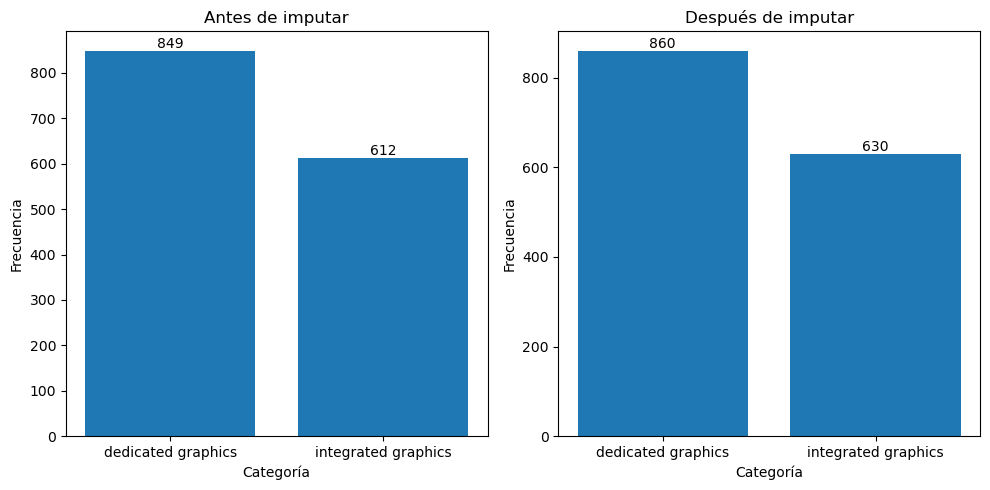

In [42]:
# Frecuencia antes de imputar
frecuencia_antes = df['graphic card type'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues = df1['graphic card type'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes.index, frecuencia_antes.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues.index, frecuencia_despues.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#### Communications

In [43]:
# Eliminar las instancias con datos faltantes
XY_1 = df1.dropna().to_numpy()

# Columna de características
x_entreno_1 = XY_1[:, 16]

# Columna a predecir
y_entreno_1 = XY_1[:, 1]

# Indices de filas incompletas
filas_1 = df[~df['communications'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_1 = df['buynow_price'].loc[filas_1].to_numpy()

# Codificar los datos de los atributos categóricos
cod_1 = OrdinalEncoder()
cod_1.fit(y_entreno_1.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_1 = cod_1.transform(y_entreno_1.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_1 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_1 = x_entreno_1.reshape(-1, 1)

# Entrenar el modelo
lr_1.fit(x_entreno_2d_1, y_entreno_1)

# Predicciones
x_prueba_2d_1 = x_prueba_1.reshape(-1, 1)
preds_1 = lr_1.predict(x_prueba_2d_1)
preds_red_1 = np.round(preds_1).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_1 = cod_1.inverse_transform(preds_red_1.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_1, 1] = cats_1.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['communications'].isna().sum()  # Cambiar el nombre del atributo

0

/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_61650/3079991406.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


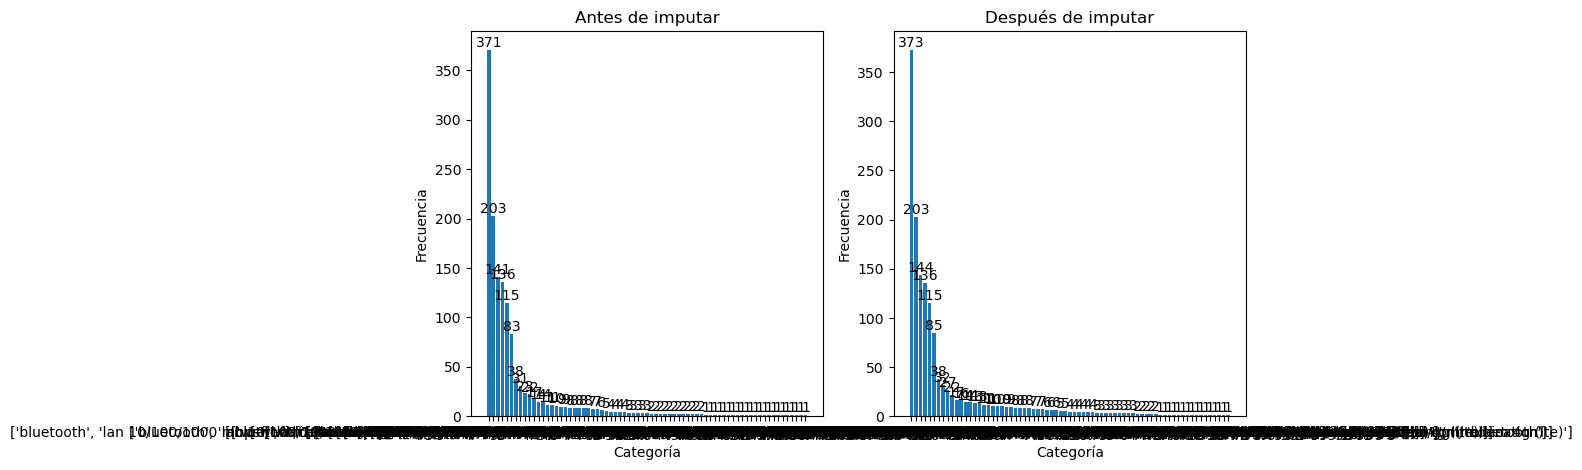

graphic card type           0
communications              0
resolution (px)            49
CPU cores                   0
RAM size                   34
operating system           60
drive type                 13
input devices              75
multimedia                 75
RAM type                  107
CPU clock speed (GHz)     129
CPU model                  31
state                       0
drive memory size (GB)     41
warranty                    0
screen size                15
buynow_price                0
dtype: int64

In [45]:
# Frecuencia antes de imputar
frecuencia_antes_1 = df['communications'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_1 = df1['communications'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_1.index, frecuencia_antes_1.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_1.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_1.index, frecuencia_despues_1.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_1.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

#### Resolution (px)

In [46]:
# Eliminar las instancias con datos faltantes
XY_2 = df1.dropna().to_numpy()

# Columna de características
x_entreno_2 = XY_2[:, 16]

# Columna a predecir
y_entreno_2 = XY_2[:, 2]

# Indices de filas incompletas
filas_2 = df[~df['resolution (px)'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_2 = df['buynow_price'].loc[filas_2].to_numpy()

# Codificar los datos de los atributos categóricos
cod_2 = OrdinalEncoder()
cod_2.fit(y_entreno_2.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod_2.categories_)

# Se transforman las clases (codificar)
y_entreno_2 = cod_2.transform(y_entreno_2.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_2 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_2 = x_entreno_2.reshape(-1, 1)

# Entrenar el modelo
lr_2.fit(x_entreno_2d_2, y_entreno_2)

# Predicciones
x_prueba_2d_2 = x_prueba_2.reshape(-1, 1)
preds_2 = lr_2.predict(x_prueba_2d_2)
preds_red_2 = np.round(preds_2).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_2 = cod_2.inverse_transform(preds_red_2.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_2, 2] = cats_2.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['resolution (px)'].isna().sum()  # Cambiar el nombre del atributo

0

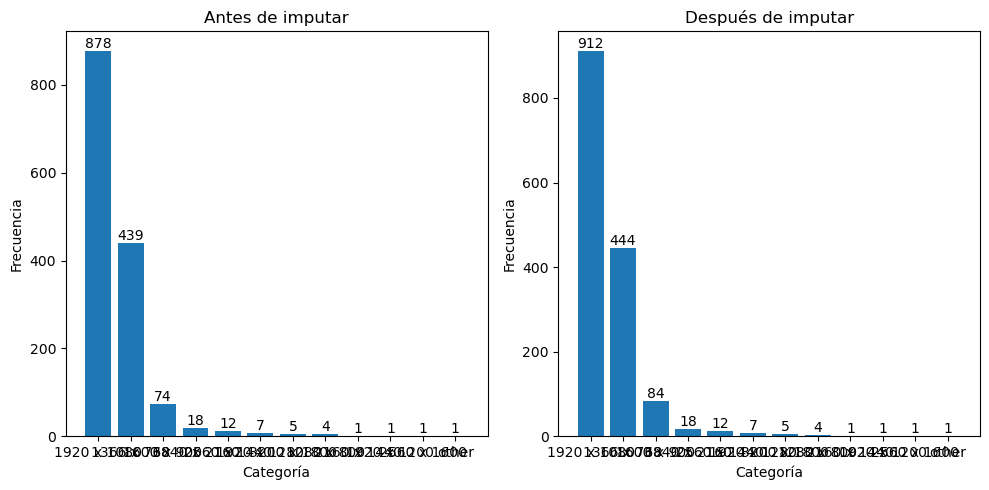

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                   34
operating system           60
drive type                 13
input devices              75
multimedia                 75
RAM type                  107
CPU clock speed (GHz)     129
CPU model                  31
state                       0
drive memory size (GB)     41
warranty                    0
screen size                15
buynow_price                0
dtype: int64

In [47]:
# Frecuencia antes de imputar
frecuencia_antes_2 = df['resolution (px)'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_2 = df1['resolution (px)'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_2.index, frecuencia_antes_2.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_2.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_2.index, frecuencia_despues_2.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_2.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

#### RAM size

In [48]:
# Eliminar las instancias con datos faltantes
XY_4 = df1.dropna().to_numpy()

# Columna de características
x_entreno_4 = XY_4[:, 16]

# Columna a predecir
y_entreno_4 = XY_4[:, 4]

# Indices de filas incompletas
filas_4 = df[~df['RAM size'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_4 = df['buynow_price'].loc[filas_4].to_numpy()

# Codificar los datos de los atributos categóricos
cod_4 = OrdinalEncoder()
cod_4.fit(y_entreno_4.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_4 = cod_4.transform(y_entreno_4.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_4 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_4 = x_entreno_4.reshape(-1, 1)

# Entrenar el modelo
lr_4.fit(x_entreno_2d_4, y_entreno_4)

# Predicciones
x_prueba_2d_4 = x_prueba_4.reshape(-1, 1)
preds_4 = lr_4.predict(x_prueba_2d_4)
preds_red_4 = np.round(preds_4).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_4 = cod_4.inverse_transform(preds_red_4.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_4, 4] = cats_4.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['RAM size'].isna().sum()  # Cambiar el nombre del atributo

0

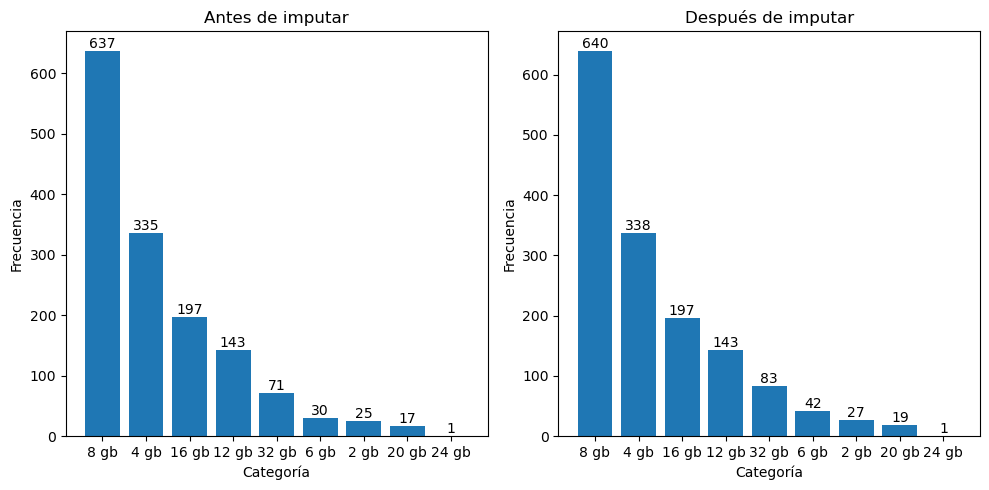

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system           60
drive type                 13
input devices              75
multimedia                 75
RAM type                  107
CPU clock speed (GHz)     129
CPU model                  31
state                       0
drive memory size (GB)     41
warranty                    0
screen size                15
buynow_price                0
dtype: int64

In [49]:
# Frecuencia antes de imputar
frecuencia_antes_4 = df['RAM size'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_4 = df1['RAM size'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_4.index, frecuencia_antes_4.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_4.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_4.index, frecuencia_despues_4.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_4.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()

#### Operating system

In [50]:
# Eliminar las instancias con datos faltantes
XY_5 = df1.dropna().to_numpy()

# Columna de características
x_entreno_5 = XY_5[:, 16]

# Columna a predecir
y_entreno_5 = XY_5[:, 5]

# Indices de filas incompletas
filas_5 = df[~df['operating system'].notna()].index

# Datos de precios para los índices anteriores
x_prueba_5 = df['buynow_price'].loc[filas_5].to_numpy()

# Codificar los datos de los atributos categóricos
cod_5 = OrdinalEncoder()
cod_5.fit(y_entreno_5.reshape(-1, 1))

# Se obtienen las clases individuales
#print(cod2.categories_)

# Se transforman las clases (codificar)
y_entreno_5 = cod_5.transform(y_entreno_5.reshape(-1, 1)).flatten()

# Modulo de KNN
lr_5 = KNeighborsRegressor(n_neighbors=3)

# Reajustando a un arreglo 2d para usar KNN
x_entreno_2d_5 = x_entreno_5.reshape(-1, 1)

# Entrenar el modelo
lr_5.fit(x_entreno_2d_5, y_entreno_5)

# Predicciones
x_prueba_2d_5 = x_prueba_5.reshape(-1, 1)
preds_5 = lr_5.predict(x_prueba_2d_5)
preds_red_5 = np.round(preds_5).astype(int)  # Porque se codifica como enteros
#print(preds_red)

# Transformaciones inversas (valores categóricos)
cats_5 = cod_5.inverse_transform(preds_red_5.reshape(-1, 1))
#print(cats)

# Actualizar el DataFrame df1 con las nuevas imputaciones (para un nuevo atributo)
df1.iloc[filas_5, 5] = cats_5.flatten()  # Cambiar el índice de acuerdo al nuevo atributo

# Verificar datos faltantes después de la imputación (para un nuevo atributo)
df1['operating system'].isna().sum()  # Cambiar el nombre del atributo

0

/var/folders/g5/4qf8flcn2w74szbtkfs707780000gn/T/ipykernel_61650/1390085685.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


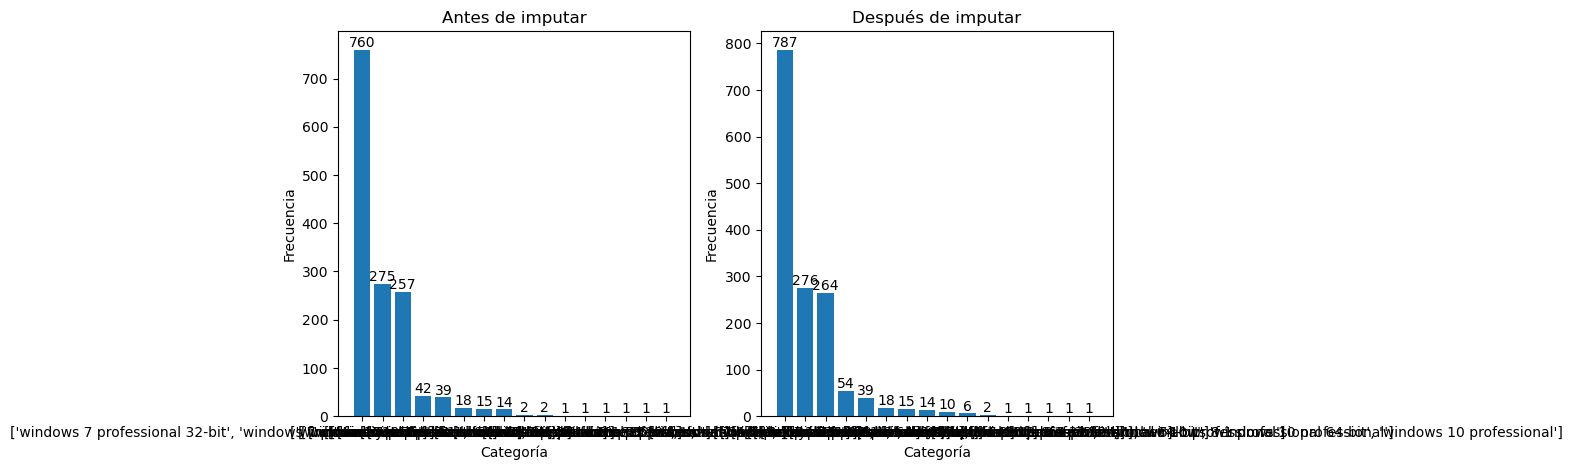

graphic card type           0
communications              0
resolution (px)             0
CPU cores                   0
RAM size                    0
operating system            0
drive type                 13
input devices              75
multimedia                 75
RAM type                  107
CPU clock speed (GHz)     129
CPU model                  31
state                       0
drive memory size (GB)     41
warranty                    0
screen size                15
buynow_price                0
dtype: int64

In [51]:
# Frecuencia antes de imputar
frecuencia_antes_5 = df['operating system'].value_counts()

# Calcular la frecuencia de los valores después de la imputación
frecuencia_despues_5 = df1['operating system'].value_counts()

# Crear subgráficos
plt.figure(figsize=(10, 5))

# Subgráfico para los datos antes de la imputación
plt.subplot(1, 2, 1)
plt.bar(frecuencia_antes_5.index, frecuencia_antes_5.values)
plt.title('Antes de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_antes_5.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Subgráfico para los datos después de la imputación
plt.subplot(1, 2, 2)
plt.bar(frecuencia_despues_5.index, frecuencia_despues_5.values)
plt.title('Después de imputar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

for i, valor in enumerate(frecuencia_despues_5.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#Datos faltantes por atributo
df1.isna().sum()